In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.utils.readoutnc

In [3]:
import glob

In [4]:
fns = glob.glob('/data/readout/2015-11-25_*_scan_lo_*.nc')
fns.sort()

In [5]:
fns

['/data/readout/2015-11-25_215746_scan_lo_1050.0_MHz.nc',
 '/data/readout/2015-11-25_220254_scan_lo_1178.0_MHz.nc',
 '/data/readout/2015-11-25_220804_scan_lo_1306.0_MHz.nc',
 '/data/readout/2015-11-25_221313_scan_lo_1434.0_MHz.nc',
 '/data/readout/2015-11-25_221818_scan_lo_1562.0_MHz.nc',
 '/data/readout/2015-11-25_222326_scan_lo_1690.0_MHz.nc']

/data/readout/2015-11-25_215746_scan_lo_1050.0_MHz.nc
/data/readout/2015-11-25_220254_scan_lo_1178.0_MHz.nc
/data/readout/2015-11-25_220804_scan_lo_1306.0_MHz.nc
/data/readout/2015-11-25_221313_scan_lo_1434.0_MHz.nc
/data/readout/2015-11-25_221818_scan_lo_1562.0_MHz.nc
/data/readout/2015-11-25_222326_scan_lo_1690.0_MHz.nc


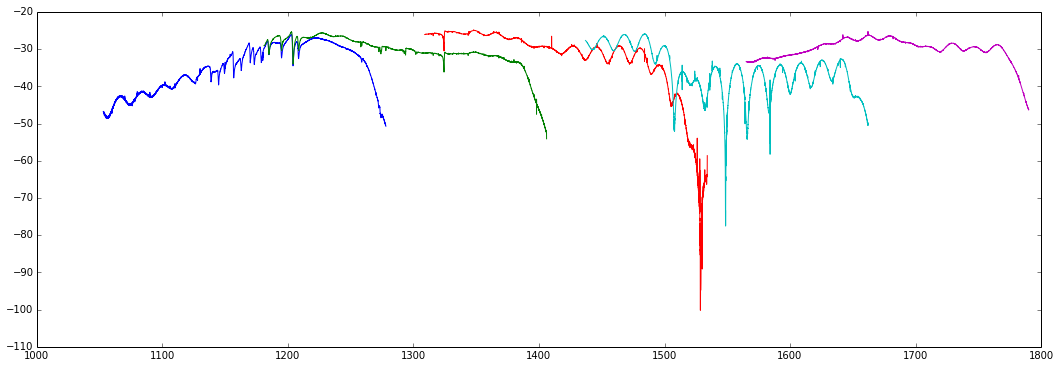

In [6]:
figure(figsize=(18,6))
freqs = []
data = []
for fn in fns:
    rnc = kid_readout.utils.readoutnc.ReadoutNetCDF(fn)
    print fn
    if len(rnc.sweeps) == 0:
        continue
    fr = rnc.sweeps[0].frequency
    s21 = rnc.sweeps[0].s21    
#    figure()
    
    plot(fr,20*np.log10(np.abs(s21)))
    rnc.close()
    freqs.append(fr)
    data.append(s21)

(-2, 2)

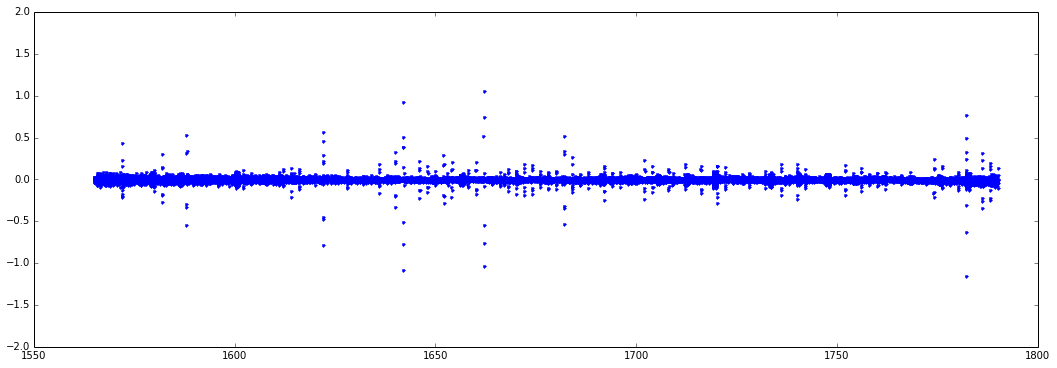

In [7]:
figure(figsize=(18,6))

plot(fr[:-1],np.diff(20*np.log10(np.abs(s21))),'.')
#xlim(1070,1080)
ylim(-2,2)

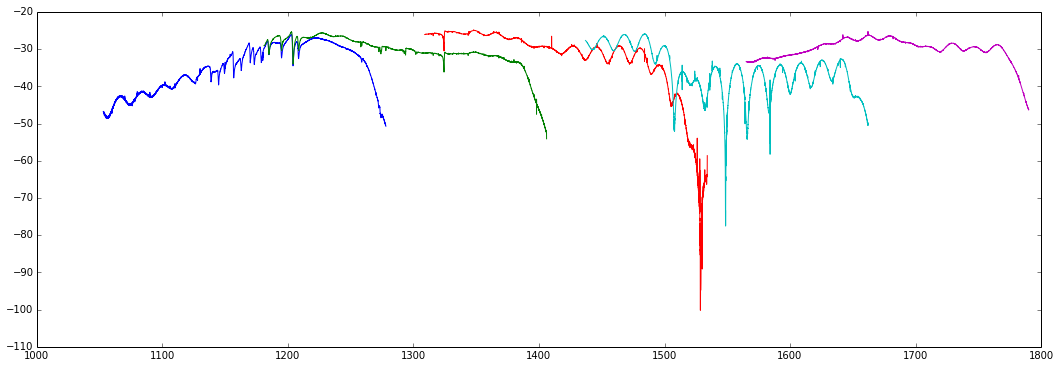

In [8]:
figure(figsize=(18,6))
for fr,s21 in zip(freqs,data):
    plot(fr,20*np.log10(np.abs(s21)))
#xlim(1300,1350)
#ylim(-28,-25)    

In [9]:
fr = freqs[1]
s21 = data[1]

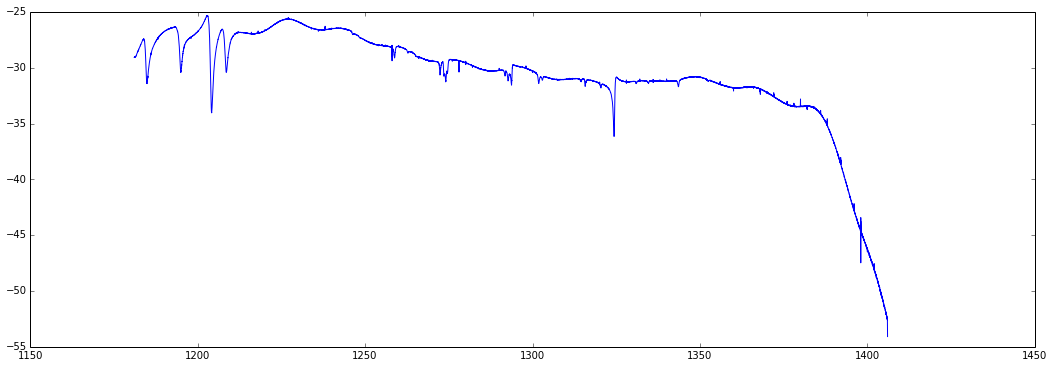

In [11]:
figure(figsize=(18,6))
plot(fr,20*np.log10(np.abs(s21)))
#xlim(1140,1160)

In [30]:
resonances = np.array([
        1126.7, #probably unusable
    1138.86,
        1144.88,
        1149.78,
        1156.7,
        1163.0,
        1170.1,
        1173.6,
        1178.9,
        1185.0,
        1195.0,
        1204.4,
        1208.5,
        1246.2,
        1248.25, #barely there
        1258.81, 
        1262.7,
        1265.2, #very shallow
        1272.3, #start of ~4 resonator complex
#        1273.4,
#        1274.2,
        1274.8,
        1291.75,
#        1292.7,
        1293.7,
        1301.8,
        1302.9,
        1314.4,
        1315.7,
        1320.3,
        1324.3,
        1330.9,
        1334.6,
        1343.5,
        1352.4,
        
])

In [31]:
resonances.shape

(32,)

In [32]:
np.save('/data/readout/resonances/2015-11-22-jpl-dual-pol-soi-set-of-16.npy',resonances)

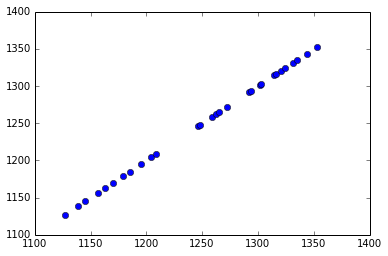

In [27]:
plot(resonances,resonances,'o')

In [ ]:
figure(figsize=(18,6))
for idx in range(8):
    plot(freqs[idx],20*np.log10(np.abs(data[idx])))

(-0.1, 0.1)

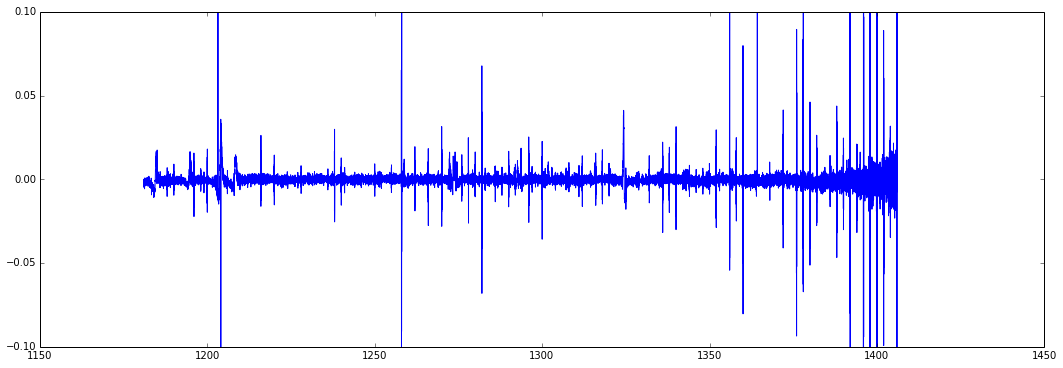

In [17]:
figure(figsize=(18,6))
for idx in range(1,2):
    fr = freqs[idx]
    s21c = data[idx]*np.exp(2j*np.pi*(fr.max()-fr)*31.3)
    plot(freqs[idx][:-1],np.diff(np.angle(s21c)),)
#xlim(1150,1200)
ylim(-.1,.1)

In [20]:
300e3/4001.

74.98125468632841

(-35, -25)

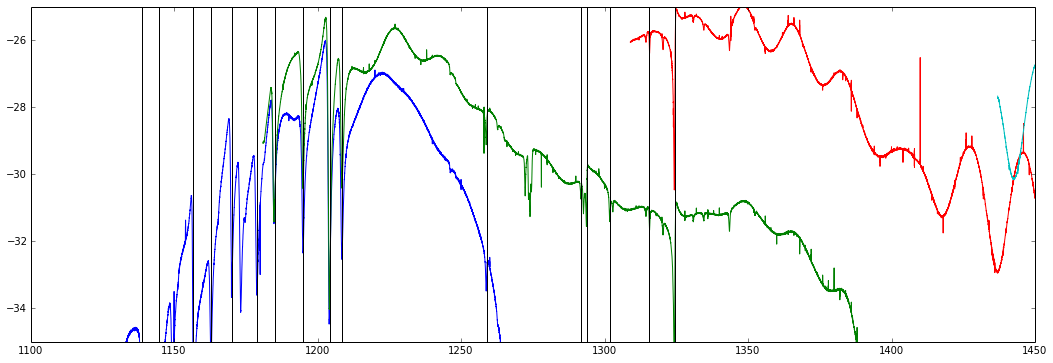

In [24]:
figure(figsize=(18,6))
for fr,s21 in zip(freqs,data):
    plot(fr,20*np.log10(np.abs(s21)))
for res in resonances:
    gca().axvline(res,color='k')
xlim(1100,1450)
ylim(-35,-25)    